<a href="https://colab.research.google.com/github/SpencerM2003/IS_4487_Tokyo/blob/main/McCallum_day3_lab_retailer_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day 3 Lab, IS 4487

Outline

Repeat exercises from Lab 2, for practice, but with the *SuperStore Retail Orders* dataset

- Loading installed packages
- Inspect data
- Clean data
- Summarize data
- Explore plot types and search for insights

Please use the Gemini AI tool to get coding ideas.



# Notebook Instructions
- Remember to save a copy of the notebook in Drive so that you can save your changes.
- Complete the Assignment Tasks.
- When you are done revising this notebook save your changes to GitHub and upload the URL for the file to Canvas for the assignment.
- Some of these assignments ask you to do things we have not covered yet.  Use AI to come up with a solution.

# Load Libraries

➡️ Assignment Tasks
- Load Pandas

In [1]:
# your code goes here
import pandas as pd


# Load Data

In [3]:
ss = pd.read_csv("https://raw.githubusercontent.com/jefftwebb/is_4487_base/main/Labs/DataSets/superstore_retail_orders.csv")

# Summarize and Review Data

➡️ Assignment Tasks

- Describe or profile the dataframe

In [4]:
# Your code goes here
ss.describe()

,order_id,quantity,product_price
count,56045.000000,56006.000000,56045.000000
mean,61668.066340,3.348498,6195.540505
std,7508.229651,422.646565,35784.727716
min,45079.000000,1.000000,2.290000
25%,55644.000000,1.000000,7.950000
50%,61869.000000,1.000000,475.600000
75%,68097.000000,2.000000,914.620000
max,74147.000000,100000.000000,235481.000000


In [5]:
ss.head()

,order_id,order_date,order_year_month,customer_name,city,state_province,quantity,product_name,product_line,product_price
0,51188,2021-07-01,2021-07,Audrey Blanco,North Cherylmouth,NEW HAMPSHIRE,3.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99
1,51187,2021-07-01,2021-07,Isaac Allen,Traceyland,WEST VIRGINIA,4.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99
2,51199,2021-07-02,2021-07,Ian Morgan,Dylanberg,SOUTH DAKOTA,5.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99
3,51241,2021-07-04,2021-07,Alexa Bell,Lake Tracytown,WISCONSIN,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99
4,51297,2021-07-08,2021-07,Casey Diaz,Byrdchester,MISSISSIPPI,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99


In [6]:
ss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56045 entries, 0 to 56044
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          56045 non-null  int64  
 1   order_date        56013 non-null  object 
 2   order_year_month  56013 non-null  object 
 3   customer_name     56045 non-null  object 
 4   city              55571 non-null  object 
 5   state_province    55571 non-null  object 
 6   quantity          56006 non-null  float64
 7   product_name      56045 non-null  object 
 8   product_line      56045 non-null  object 
 9   product_price     56045 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 4.3+ MB


# Prepare Data

➡️ Assignment Tasks
- Remove rows with empty (NULL) values
- Locate outliers in any of the variables.   Filter them out if they appear to be mistakes; keep them if they are exceptional cases.
- Create a new field: total_purchase. This should be product_price x quantity.

In [7]:
# Drop NAs
ss = ss.dropna()

In [8]:
# Search for and filter outliers
ss=ss[ss.quantity <5000]
ss=ss[ss.product_price <10000]

In [9]:
# create total_purchase

ss['total_purchase'] = ss['quantity'] * ss['product_price']

Check that your cleaning worked

In [10]:
# your code goes here
ss.describe()

,order_id,quantity,product_price,total_purchase
count,54173.000000,54173.000000,54173.000000,5.417300e+04
mean,61642.138224,1.553025,614.109579,7.973136e+02
std,7518.845903,9.284931,816.673965,1.412708e+04
min,45079.000000,1.000000,2.290000,2.290000e+00
25%,55623.000000,1.000000,7.950000,1.497000e+01
50%,61855.000000,1.000000,475.600000,4.756000e+02
75%,68063.000000,2.000000,914.620000,1.000440e+03
max,74147.000000,2000.000000,3578.270000,2.024994e+06


# Summarize Data

➡️ Assignment Tasks
- Calculate the average price per year-month
- Calculate the total revenue per year month

Does more cleaning need to be done? If so, do it and then recreate the above summary tables.

In [13]:
# average price
ss['order_date'] = pd.to_datetime(ss['order_date'], errors='coerce')

ss_filtered = ss[(ss['order_date'].dt.year >=2020) & (ss['order_date'].dt.year <=2022)]
ss['year_month'] = ss['order_date'].dt.to_period('M')
ss.groupby('year_month')['product_price'].mean()

year_month
1922-06     587.584737
2020-01    3172.420978
2020-02    3199.469359
2020-03    3242.035279
2020-04    3194.646275
2020-05    3192.571359
2020-06    3132.275911
2020-07    1959.974251
2020-08    1924.981087
2020-09    1764.130833
2020-10    1800.830762
2020-11    1666.368901
2020-12    1729.697795
2021-01    1774.621612
2021-02    1755.272269
2021-03    1760.495962
2021-04    1691.161107
2021-05    1640.100368
2021-06    1694.477581
2021-07     729.851550
2021-08     409.107649
2021-09     437.462140
2021-10     434.127245
2021-11     468.310875
2021-12     500.330821
2022-01     469.658801
2022-02     481.718170
2022-03     485.362163
2022-04     482.481023
2022-05     513.701953
2022-06     509.168107
2029-06       3.640000
2029-07     498.690357
2029-08       6.656667
Freq: M, Name: product_price, dtype: float64

In [14]:
# total revenue
ss_filtered['order_year_month'] = ss['order_date'].dt.to_period('M')
ss_filtered.groupby('order_year_month')['total_purchase'].mean()

<ipython-input-14-e18075bbedbd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ss_filtered['order_year_month'] = ss['order_date'].dt.to_period('M')


order_year_month
2020-01    25788.858315
2020-02     3199.469359
2020-03     3587.147614
2020-04     3194.646275
2020-05     3192.571359
2020-06     3132.275911
2020-07     1959.974251
2020-08     1924.981087
2020-09     1764.130833
2020-10     1800.830762
2020-11     1666.368901
2020-12     1729.697795
2021-01     1774.621612
2021-02     1755.272269
2021-03     1760.495962
2021-04     1691.161107
2021-05     1640.100368
2021-06     1694.477581
2021-07      787.698376
2021-08      497.058974
2021-09      521.074585
2021-10      513.792344
2021-11      547.528252
2021-12      578.963471
2022-01      551.838281
2022-02      556.058111
2022-03      956.717746
2022-04      555.947491
2022-05      587.997629
2022-06      582.438453
Freq: M, Name: total_purchase, dtype: float64

# Plot Data

➡️ Assignment Tasks
- Produce two plots that show patterns or relationships in the data.
- Interpret these patterns for potential value to the business.  

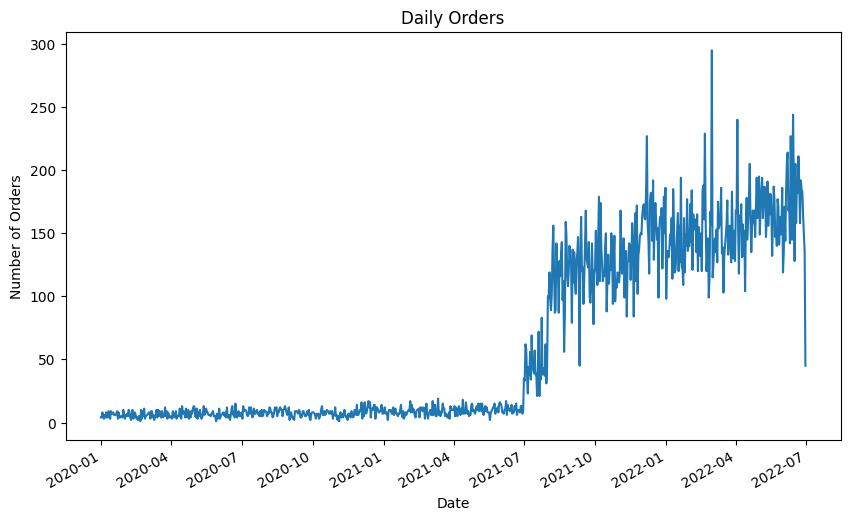

In [18]:
# Your code goes here.  Plot 1
import matplotlib.pyplot as plt
import seaborn as mdates # seaborn is not used in this code and can be removed

daily_order = ss_filtered.groupby('order_date')['order_id'].count()

# Use the correct variable name 'daily_order'
ax = daily_order.plot(kind='line', figsize=(10, 6), title='Daily Orders')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Orders')
plt.show() # this will display the plot

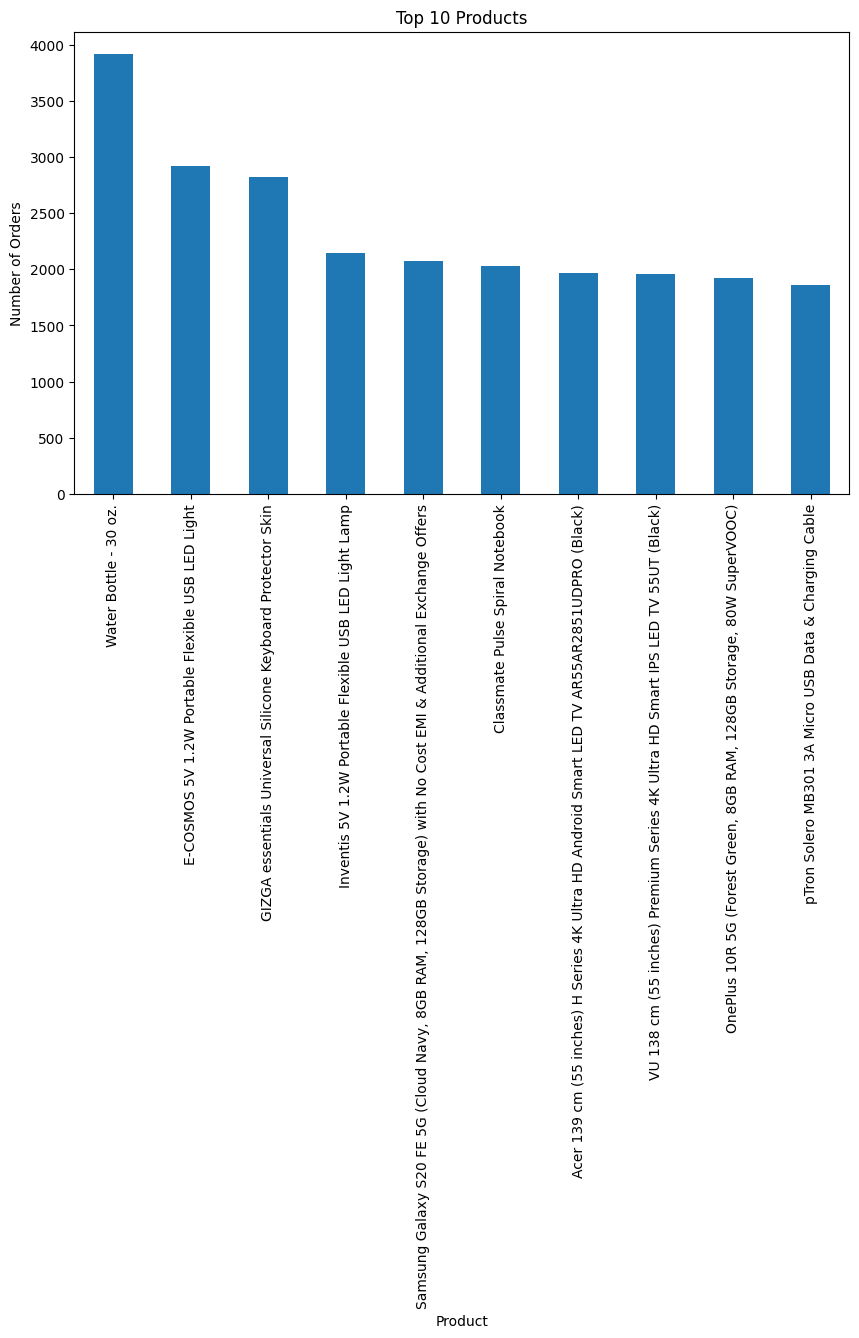

In [19]:
# Your code goes here.  Plot 2
import matplotlib.pyplot as plt

top_products = ss_filtered.groupby('product_name')['order_id'].count().nlargest(10)

ax = top_products.plot(kind='bar', figsize=(10, 6), title='Top 10 Products')
ax.set_xlabel('Product')
ax.set_ylabel('Number of Orders')
plt.show()

Make an interpretive comment.